In [1]:
import os
import sys
sys.path.append("/mnt/code")

In [2]:
# The following import and function call are the only additions to code required
# to automatically log metrics and parameters to MLflow.
import mlflow
from domino_mlflow_utils.mlflow_utilities import *
mlflow_utils = DominoMLflowUtilities()

In [3]:
import os
## Apply Autologging for Tensorflow
mlflow.tensorflow.autolog()
experiment_name= os.environ['DOMINO_PROJECT_NAME'] + "-mlflow_tensorboard"
mlflow_utils.init(experiment_name)

2024-03-04 14:19:57.776714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/oracle/instantclient_12_1:/usr/lib/jvm/java-11-openjdk-amd64/jre/lib/amd64/server:
2024-03-04 14:19:57.776750: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Checking for active runs, Active Run= None
Started new run with run_id: 0da02b0bbdc04608bbec10342545a732


In [4]:
import os
# Don't use GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
"""Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
"""
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer


mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
      return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
      ])

model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2024-03-04 14:19:59.491847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/oracle/instantclient_12_1:/usr/lib/jvm/java-11-openjdk-amd64/jre/lib/amd64/server:
2024-03-04 14:19:59.491892: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-04 14:19:59.491921: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (run-65e5d185e9f4eb77a843074f-6mzvz): /proc/driver/nvidia/version does not exist
2024-03-04 14:19:59.492254: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from tbparse import SummaryReader
#reader = SummaryReader(log_dir, extra_columns={'dir_name'})
#df = reader.tensors
tmpdirs = {}
tmpdirs['tensorflow'] = '/tmp/logs-4'
log_dir = '/tmp/logs-4'
print(log_dir)
writer = tf.summary.create_file_writer('/tmp/logs-4')
writer.set_as_default()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='/tmp/logs-4',histogram_freq=1,write_graph=False, write_images=False)
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])



/tmp/logs-4


2024-03-04 14:20:00.218334: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2024-03-04 14:20:00.218379: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2024-03-04 14:20:00.218788: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2024-03-04 14:20:01.058173: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-03-04 14:20:01.058715: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2800205000 Hz


Epoch 1/5
  23/1875 [..............................] - ETA: 16s - loss: 1.3750 - accuracy: 0.6005 

2024-03-04 14:20:01.449462: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2024-03-04 14:20:01.449522: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2024-03-04 14:20:01.455076: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2024-03-04 14:20:01.455944: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2024-03-04 14:20:01.457268: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/logs-4/train/plugins/profile/2024_03_04_14_20_01
2024-03-04 14:20:01.458115: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /tmp/logs-4/train/plugins/profile/2024_03_04_14_20_01/run-65e5d185e9f4eb77a843074f-6mzvz.trace.json.gz
2024-03-04 14:20:01.460420: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/logs-4/train/plugins/profile/2024_03_

1875/1875 [==============================] - 14s 8ms/step - loss: 0.2169 - accuracy: 0.9358 - val_loss: 0.1002 - val_accuracy: 0.9690
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0962 - accuracy: 0.9709 - val_loss: 0.0784 - val_accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0679 - accuracy: 0.9787 - val_loss: 0.0770 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0556 - accuracy: 0.9824 - val_loss: 0.0604 - val_accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0422 - accuracy: 0.9860 - val_loss: 0.0647 - val_accuracy: 0.9798


2024/03/04 14:21:10 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/03/04 14:21:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024-03-04 14:21:10.769465: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmp1ifjzbt2/model/data/model/assets


2024/03/04 14:21:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/envs/tensorboard/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


## Download Tensorboard Logs

The next cell demonstrates how to fetch the tensorboard logs for any run for which these logs have been registered.

A local tensorboard instance can be used to render these logs. The benefit of this approach is that it can be used to register tensorboard logs for any experiment run and can be downloaded when needed for review. They do not have to be stored in your workspace or repo.

You can go to the run artifacts UI to verify the detailed logs.



In [6]:
r = mlflow.active_run()
run_id=r.info.run_id
home_dir = os.path.expanduser('~')
download_path=f'{home_dir}/{run_id}'
mlflow.artifacts.download_artifacts(run_id=run_id,dst_path=download_path)
print(f"The artifacts for {run_id} will be downloaded to the folder {download_path}")
os.listdir(download_path)

The artifacts for 0da02b0bbdc04608bbec10342545a732 will be downloaded to the folder /home/ubuntu/0da02b0bbdc04608bbec10342545a732


['tensorboard_logs', 'model', 'model_summary.txt']

In [7]:


mlflow_utils.finish()


run_id: 0da02b0bbdc04608bbec10342545a732; status: RUNNING
--


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from collections import defaultdict, namedtuple
from typing import List
import tensorflow as tf
from tensorflow.core.util import event_pb2 

TensorBoardImage = namedtuple("TensorBoardImage", ["topic", "image", "cnt"])

data = []
def extract_images_from_event(event_filename: str, image_tags: List[str]):
    step = 0
    my_list = {}
    
    
    topic_counter = defaultdict(lambda: 0)

    serialized_examples = tf.data.TFRecordDataset(event_filename)
    for serialized_example in serialized_examples:
        wtimes,steps,actions = [],[],[]
        #print(dir(serialized_example))
        #print(serialized_example.value_index)
        event = event_pb2.Event.FromString(serialized_example.numpy())
        #print(type(event.summary))
        wtime   = event.wall_time
        step    = event.step
        #print(event.summary.value)
        for v in event.summary.value:
            #print(v.tag)
            if v.tag in image_tags:                                
                if v.HasField('histo'):  # event for images using tensor field

                    #print(v.tag)                   
                    hist = v.histo
                    #print(hist)
                    wtimes += [wtime]*int(v.histo.num)
                    steps  += [step] *int(v.histo.num)
                    #print(steps)
                    for num,val in zip(v.histo.bucket,v.histo.bucket_limit):
                        actions += [val] *int(num)
                    my_list[step]={'wtimes':wtimes,'steps':steps,'actions':actions}
                    #print(wtimes)
                    step = step + 1
        
    '''
    for k,v in my_list.items():
        print(k)
        print(v)
    N_points = 10
    n_bins = 5
    '''

    return my_list

def plot_tb(name,my_list):
    # Generate two normal distributions
    x0 = my_list[0]['actions']
    x1 = my_list[1]['actions']
    x2 = my_list[2]['actions']
    x3 = my_list[3]['actions']
    x4 = my_list[4]['actions']
    d1 = {'Step0': x0, 'Step1': x1, 'Step2': x2, 'Step3': x3, 'Step4': x4}

    df = pd.DataFrame(data=d1)

    plt.figure(figsize=(12,5))
    plt.xlabel(name)

    ax1 = df['Step0'].plot(color='blue', grid=True, label='Step0')
    ax2 = df['Step1'].plot(color='green', grid=True,  label='Step1')
    ax2 = df['Step2'].plot(color='red', grid=True,  label='Step2')
    ax2 = df['Step3'].plot(color='cyan', grid=True,  label='Step3')
    ax2 = df['Step4'].plot(color='magenta', grid=True,  label='Step4')


    h1, l1 = ax1.get_legend_handles_labels()
    #h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1, l1, loc=2,fancybox=True, framealpha=0.5)
    plt.show()

                  
 


In [10]:
home_dir = os.path.expanduser('~')
download_path=f'{home_dir}/{run_id}'

path = f'{download_path}/tensorboard_logs/train'
files = os.listdir(path)
events_path=''
for f in files:
    if f.startswith('events'):
        events_path=f'{path}/{f}'

events_path

'/home/ubuntu/0da02b0bbdc04608bbec10342545a732/tensorboard_logs/train/events.out.tfevents.1709562000.run-65e5d185e9f4eb77a843074f-6mzvz.1243.142.v2'

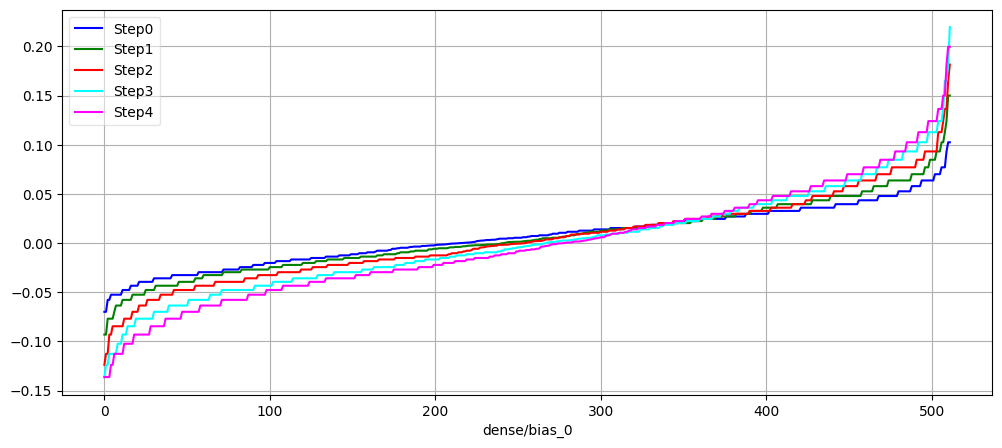

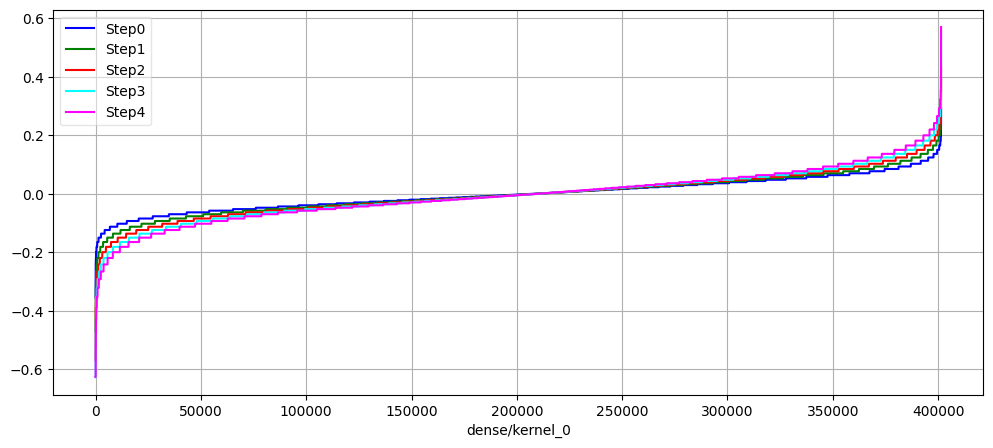

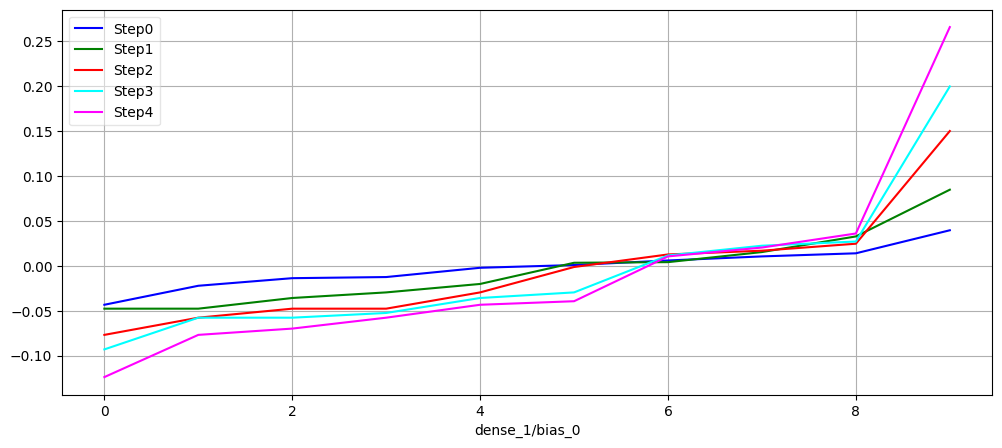

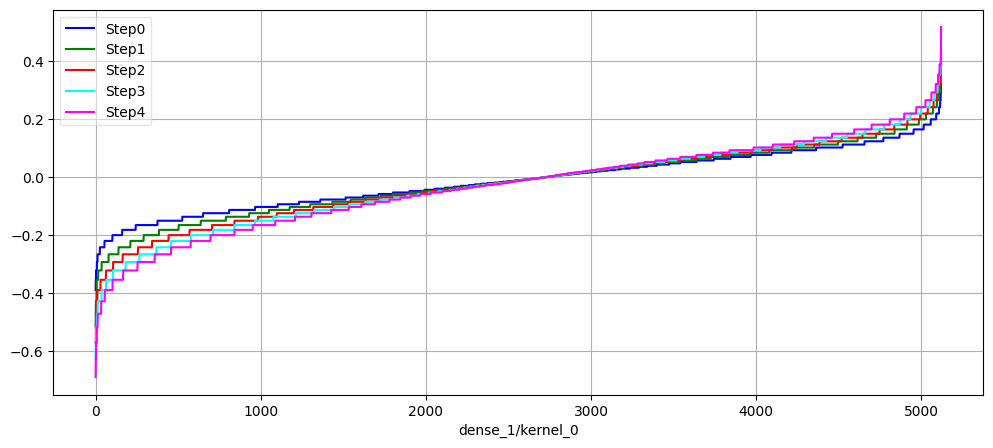

In [12]:
#events_path='/tmp/logs-4/train/events.out.tfevents.1709540777.run-65e581e390758361e5bc34be-tltxj.1902.142.v2'

if events_path:
    tags = ['dense/bias_0','dense/kernel_0','dense_1/bias_0','dense_1/kernel_0']
    my_list = extract_images_from_event(events_path,[tags[0]])
    plot_tb(tags[0],my_list)
    
    my_list = extract_images_from_event(events_path,[tags[1]])
    plot_tb(tags[1],my_list)
    
    my_list = extract_images_from_event(events_path,[tags[2]])
    plot_tb(tags[2],my_list)
    
    my_list = extract_images_from_event(events_path,[tags[3]])
    plot_tb(tags[3],my_list)
    


In [ ]:
#!jupyter nbconvert --clear-output --inplace notebooks/basic/*.ipynb